In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
np.random.seed(777)
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import DenseNet201
from keras.applications import DenseNet121

from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [12]:
train_dir = 'data/breakhis/train/'
test_dir = "data/breakhis/test/"

extracted_features_dir = "extracted_features/"
model_name = "breakhis_vgg19"

In [13]:
import keras
import tensorflow as tf
import keras.backend as K

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.2.4
tensorflow Version 1.9.0
dim_ordering: tf


In [14]:
batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 1000

In [15]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

data/breakhis/train/ 0
data/breakhis/train/benign 36224
data/breakhis/train/malignant 79168
******************************
data/breakhis/test/ 0
data/breakhis/test/benign 216
data/breakhis/test/malignant 481


In [16]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.25,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'training',
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'validation',
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 86544 images belonging to 2 classes.
Found 28848 images belonging to 2 classes.
Found 697 images belonging to 2 classes.


In [17]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))

# nb_test_without_aug_samples = len(test_generator_without_aug.filenames)
# predict_size_test_without_aug = int(math.ceil(nb_test_without_aug_samples / batch_size))

num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_validation)
# print("nb_test_without_aug_samples:", nb_test_without_aug_samples)
# print("predict_size_test_without_aug_samples:", predict_size_test_without_aug)
print("nb_test_samples:", nb_test_samples)
print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 86544
nb_validation_samples: 28848

predict_size_train: 2705
predict_size_validation: 902
nb_test_samples: 697
predict_size_test: 22

 num_classes: 2


In [18]:
from keras.backend.tensorflow_backend import get_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import set_session

def reset_keras_tf_session():
    """
    this function clears the gpu memory and set the 
    tf session to not use the whole gpu
    """
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

#     config = tf.ConfigProto()
#     config.gpu_options.allow_growth = True
#     set_session(tf.Session(config=config))


reset_keras_tf_session()

In [19]:
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.densenet import DenseNet169
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile

input_tensor = Input(shape = input_shape)  
model = VGG19(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)

In [20]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 global_average_pooling2d_1


In [21]:
c1 = model.layers[4].output 
c1 = GlobalAveragePooling2D()(c1)       

c2 = model.layers[7].output
c2 = GlobalAveragePooling2D()(c2)       

c3 = model.layers[12].output
c3 = GlobalAveragePooling2D()(c3)       

c4 = model.layers[17].output
c4 = GlobalAveragePooling2D()(c4)

con = concatenate([c1, c2, c4])

bottleneck_final_model = Model(inputs=model.input, outputs=con)

In [22]:
bottleneck_final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [23]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [24]:
bottleneck_features_validation = bottleneck_final_model.predict_generator(validation_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [25]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [26]:
dropout_rate = 0.4

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name+'.txt','w') as f:
    f.write(str(history.history))

# model.save_weights(top_model_weights_path)
# model.save(top_model_path)

Train on 86544 samples, validate on 28848 samples
Epoch 1/1000
 - 10s - loss: 0.3549 - acc: 0.8557 - val_loss: 0.2509 - val_acc: 0.9048
Epoch 2/1000
 - 9s - loss: 0.2555 - acc: 0.8997 - val_loss: 0.2117 - val_acc: 0.9180
Epoch 3/1000
 - 9s - loss: 0.2188 - acc: 0.9137 - val_loss: 0.1859 - val_acc: 0.9266
Epoch 4/1000
 - 9s - loss: 0.1959 - acc: 0.9222 - val_loss: 0.1663 - val_acc: 0.9329
Epoch 5/1000
 - 9s - loss: 0.1795 - acc: 0.9295 - val_loss: 0.1645 - val_acc: 0.9325
Epoch 6/1000
 - 9s - loss: 0.1657 - acc: 0.9337 - val_loss: 0.1531 - val_acc: 0.9407
Epoch 7/1000
 - 9s - loss: 0.1572 - acc: 0.9377 - val_loss: 0.1392 - val_acc: 0.9424
Epoch 8/1000
 - 9s - loss: 0.1501 - acc: 0.9406 - val_loss: 0.1388 - val_acc: 0.9421
Epoch 9/1000
 - 9s - loss: 0.1424 - acc: 0.9444 - val_loss: 0.1268 - val_acc: 0.9501
Epoch 10/1000
 - 9s - loss: 0.1358 - acc: 0.9465 - val_loss: 0.1298 - val_acc: 0.9500
Epoch 11/1000
 - 9s - loss: 0.1337 - acc: 0.9481 - val_loss: 0.1230 - val_acc: 0.9500
Epoch 12/100

Epoch 96/1000
 - 9s - loss: 0.0773 - acc: 0.9770 - val_loss: 0.0822 - val_acc: 0.9785
Epoch 97/1000
 - 9s - loss: 0.0778 - acc: 0.9774 - val_loss: 0.0819 - val_acc: 0.9775
Epoch 98/1000
 - 9s - loss: 0.0769 - acc: 0.9776 - val_loss: 0.0897 - val_acc: 0.9735
Epoch 99/1000
 - 9s - loss: 0.0764 - acc: 0.9773 - val_loss: 0.0676 - val_acc: 0.9798
Epoch 100/1000
 - 9s - loss: 0.0773 - acc: 0.9779 - val_loss: 0.0685 - val_acc: 0.9780
Epoch 101/1000
 - 9s - loss: 0.0764 - acc: 0.9782 - val_loss: 0.0712 - val_acc: 0.9794
Epoch 102/1000
 - 9s - loss: 0.0767 - acc: 0.9777 - val_loss: 0.0630 - val_acc: 0.9817
Epoch 103/1000
 - 9s - loss: 0.0758 - acc: 0.9779 - val_loss: 0.0611 - val_acc: 0.9830
Epoch 104/1000
 - 9s - loss: 0.0764 - acc: 0.9781 - val_loss: 0.0762 - val_acc: 0.9797
Epoch 105/1000
 - 9s - loss: 0.0776 - acc: 0.9780 - val_loss: 0.0679 - val_acc: 0.9810
Epoch 106/1000
 - 9s - loss: 0.0752 - acc: 0.9784 - val_loss: 0.0651 - val_acc: 0.9820
Epoch 107/1000
 - 9s - loss: 0.0779 - acc: 0.97

Epoch 191/1000
 - 9s - loss: 0.0751 - acc: 0.9808 - val_loss: 0.0642 - val_acc: 0.9831
Epoch 192/1000
 - 9s - loss: 0.0746 - acc: 0.9814 - val_loss: 0.0590 - val_acc: 0.9853
Epoch 193/1000
 - 9s - loss: 0.0761 - acc: 0.9812 - val_loss: 0.0677 - val_acc: 0.9818
Epoch 194/1000
 - 9s - loss: 0.0770 - acc: 0.9808 - val_loss: 0.1494 - val_acc: 0.9637
Epoch 195/1000
 - 9s - loss: 0.0783 - acc: 0.9808 - val_loss: 0.0777 - val_acc: 0.9818
Epoch 196/1000
 - 9s - loss: 0.0782 - acc: 0.9804 - val_loss: 0.0647 - val_acc: 0.9841
Epoch 197/1000
 - 9s - loss: 0.0797 - acc: 0.9809 - val_loss: 0.0660 - val_acc: 0.9843
Epoch 198/1000
 - 9s - loss: 0.0771 - acc: 0.9811 - val_loss: 0.0613 - val_acc: 0.9847
Epoch 199/1000
 - 9s - loss: 0.0768 - acc: 0.9807 - val_loss: 0.0833 - val_acc: 0.9806
Epoch 200/1000
 - 9s - loss: 0.0770 - acc: 0.9804 - val_loss: 0.0792 - val_acc: 0.9812
Epoch 201/1000
 - 9s - loss: 0.0765 - acc: 0.9815 - val_loss: 0.0808 - val_acc: 0.9773
Epoch 202/1000
 - 9s - loss: 0.0750 - acc: 

 - 9s - loss: 0.0777 - acc: 0.9817 - val_loss: 0.0694 - val_acc: 0.9851
Epoch 286/1000
 - 9s - loss: 0.0784 - acc: 0.9819 - val_loss: 0.0592 - val_acc: 0.9863
Epoch 287/1000
 - 9s - loss: 0.0765 - acc: 0.9825 - val_loss: 0.0833 - val_acc: 0.9829
Epoch 288/1000
 - 9s - loss: 0.0761 - acc: 0.9824 - val_loss: 0.0755 - val_acc: 0.9842
Epoch 289/1000
 - 9s - loss: 0.0770 - acc: 0.9821 - val_loss: 0.0697 - val_acc: 0.9857
Epoch 290/1000
 - 9s - loss: 0.0779 - acc: 0.9822 - val_loss: 0.0697 - val_acc: 0.9839
Epoch 291/1000
 - 9s - loss: 0.0779 - acc: 0.9825 - val_loss: 0.0619 - val_acc: 0.9851
Epoch 292/1000
 - 9s - loss: 0.0776 - acc: 0.9821 - val_loss: 0.0713 - val_acc: 0.9847
Epoch 293/1000
 - 9s - loss: 0.0805 - acc: 0.9817 - val_loss: 0.0734 - val_acc: 0.9844
Epoch 294/1000
 - 9s - loss: 0.0780 - acc: 0.9828 - val_loss: 0.0693 - val_acc: 0.9841
Epoch 295/1000
 - 9s - loss: 0.0787 - acc: 0.9817 - val_loss: 0.0637 - val_acc: 0.9859
Epoch 296/1000
 - 9s - loss: 0.0777 - acc: 0.9825 - val_lo

Epoch 380/1000
 - 9s - loss: 0.0812 - acc: 0.9826 - val_loss: 0.0651 - val_acc: 0.9861
Epoch 381/1000
 - 9s - loss: 0.0781 - acc: 0.9832 - val_loss: 0.0733 - val_acc: 0.9843
Epoch 382/1000
 - 9s - loss: 0.0781 - acc: 0.9830 - val_loss: 0.0756 - val_acc: 0.9842
Epoch 383/1000
 - 9s - loss: 0.0775 - acc: 0.9830 - val_loss: 0.0727 - val_acc: 0.9849
Epoch 384/1000
 - 9s - loss: 0.0758 - acc: 0.9833 - val_loss: 0.0761 - val_acc: 0.9849
Epoch 385/1000
 - 9s - loss: 0.0802 - acc: 0.9837 - val_loss: 0.0816 - val_acc: 0.9832
Epoch 386/1000
 - 9s - loss: 0.0780 - acc: 0.9832 - val_loss: 0.0964 - val_acc: 0.9816
Epoch 387/1000
 - 9s - loss: 0.0805 - acc: 0.9833 - val_loss: 0.0765 - val_acc: 0.9841
Epoch 388/1000
 - 9s - loss: 0.0788 - acc: 0.9835 - val_loss: 0.0657 - val_acc: 0.9864
Epoch 389/1000
 - 9s - loss: 0.0784 - acc: 0.9833 - val_loss: 0.0786 - val_acc: 0.9847
Epoch 390/1000
 - 9s - loss: 0.0780 - acc: 0.9834 - val_loss: 0.0884 - val_acc: 0.9821
Epoch 391/1000
 - 9s - loss: 0.0776 - acc: 

 - 9s - loss: 0.0774 - acc: 0.9841 - val_loss: 0.0738 - val_acc: 0.9852
Epoch 475/1000
 - 9s - loss: 0.0777 - acc: 0.9837 - val_loss: 0.0691 - val_acc: 0.9849
Epoch 476/1000
 - 9s - loss: 0.0800 - acc: 0.9836 - val_loss: 0.0738 - val_acc: 0.9837
Epoch 477/1000
 - 9s - loss: 0.0775 - acc: 0.9840 - val_loss: 0.0729 - val_acc: 0.9843
Epoch 478/1000
 - 9s - loss: 0.0789 - acc: 0.9836 - val_loss: 0.0825 - val_acc: 0.9820
Epoch 479/1000
 - 9s - loss: 0.0777 - acc: 0.9843 - val_loss: 0.0679 - val_acc: 0.9854
Epoch 480/1000
 - 9s - loss: 0.0775 - acc: 0.9842 - val_loss: 0.0785 - val_acc: 0.9853
Epoch 481/1000
 - 9s - loss: 0.0791 - acc: 0.9839 - val_loss: 0.0728 - val_acc: 0.9844
Epoch 482/1000
 - 9s - loss: 0.0773 - acc: 0.9838 - val_loss: 0.0701 - val_acc: 0.9856
Epoch 483/1000
 - 9s - loss: 0.0811 - acc: 0.9834 - val_loss: 0.0716 - val_acc: 0.9851
Epoch 484/1000
 - 9s - loss: 0.0804 - acc: 0.9829 - val_loss: 0.0663 - val_acc: 0.9860
Epoch 485/1000
 - 9s - loss: 0.0792 - acc: 0.9840 - val_lo

Epoch 569/1000
 - 9s - loss: 0.0793 - acc: 0.9839 - val_loss: 0.0714 - val_acc: 0.9851
Epoch 570/1000
 - 9s - loss: 0.0755 - acc: 0.9840 - val_loss: 0.0747 - val_acc: 0.9865
Epoch 571/1000
 - 9s - loss: 0.0777 - acc: 0.9847 - val_loss: 0.0777 - val_acc: 0.9850
Epoch 572/1000
 - 9s - loss: 0.0767 - acc: 0.9844 - val_loss: 0.0778 - val_acc: 0.9855
Epoch 573/1000
 - 9s - loss: 0.0789 - acc: 0.9841 - val_loss: 0.0760 - val_acc: 0.9861
Epoch 574/1000
 - 9s - loss: 0.0812 - acc: 0.9839 - val_loss: 0.0746 - val_acc: 0.9857
Epoch 575/1000
 - 9s - loss: 0.0833 - acc: 0.9837 - val_loss: 0.0853 - val_acc: 0.9849
Epoch 576/1000
 - 9s - loss: 0.0838 - acc: 0.9832 - val_loss: 0.0730 - val_acc: 0.9863
Epoch 577/1000
 - 9s - loss: 0.0744 - acc: 0.9837 - val_loss: 0.0819 - val_acc: 0.9839
Epoch 578/1000
 - 9s - loss: 0.0809 - acc: 0.9835 - val_loss: 0.0799 - val_acc: 0.9842
Epoch 579/1000
 - 9s - loss: 0.0765 - acc: 0.9845 - val_loss: 0.0722 - val_acc: 0.9869
Epoch 580/1000
 - 9s - loss: 0.0812 - acc: 

 - 9s - loss: 0.0794 - acc: 0.9849 - val_loss: 0.0736 - val_acc: 0.9861
Epoch 664/1000
 - 9s - loss: 0.0771 - acc: 0.9853 - val_loss: 0.0783 - val_acc: 0.9858
Epoch 665/1000
 - 9s - loss: 0.0765 - acc: 0.9846 - val_loss: 0.0715 - val_acc: 0.9860
Epoch 666/1000
 - 9s - loss: 0.0824 - acc: 0.9844 - val_loss: 0.0754 - val_acc: 0.9850
Epoch 667/1000
 - 9s - loss: 0.0801 - acc: 0.9842 - val_loss: 0.0684 - val_acc: 0.9858
Epoch 668/1000
 - 9s - loss: 0.0789 - acc: 0.9848 - val_loss: 0.0872 - val_acc: 0.9843
Epoch 669/1000
 - 9s - loss: 0.0823 - acc: 0.9838 - val_loss: 0.0723 - val_acc: 0.9866
Epoch 670/1000
 - 9s - loss: 0.0830 - acc: 0.9835 - val_loss: 0.0689 - val_acc: 0.9866
Epoch 671/1000
 - 9s - loss: 0.0792 - acc: 0.9845 - val_loss: 0.0811 - val_acc: 0.9856
Epoch 672/1000
 - 9s - loss: 0.0806 - acc: 0.9847 - val_loss: 0.0703 - val_acc: 0.9851
Epoch 673/1000
 - 9s - loss: 0.0812 - acc: 0.9843 - val_loss: 0.0750 - val_acc: 0.9870
Epoch 674/1000
 - 9s - loss: 0.0815 - acc: 0.9846 - val_lo

Epoch 758/1000
 - 9s - loss: 0.0803 - acc: 0.9850 - val_loss: 0.0783 - val_acc: 0.9852
Epoch 759/1000
 - 9s - loss: 0.0786 - acc: 0.9842 - val_loss: 0.1051 - val_acc: 0.9820
Epoch 760/1000
 - 9s - loss: 0.0751 - acc: 0.9852 - val_loss: 0.0840 - val_acc: 0.9845
Epoch 761/1000
 - 9s - loss: 0.0772 - acc: 0.9844 - val_loss: 0.0736 - val_acc: 0.9852
Epoch 762/1000
 - 9s - loss: 0.0827 - acc: 0.9839 - val_loss: 0.0994 - val_acc: 0.9821
Epoch 763/1000
 - 9s - loss: 0.0787 - acc: 0.9847 - val_loss: 0.0777 - val_acc: 0.9855
Epoch 764/1000
 - 9s - loss: 0.0800 - acc: 0.9837 - val_loss: 0.0831 - val_acc: 0.9847
Epoch 765/1000
 - 9s - loss: 0.0812 - acc: 0.9853 - val_loss: 0.0745 - val_acc: 0.9867
Epoch 766/1000
 - 9s - loss: 0.0787 - acc: 0.9854 - val_loss: 0.0730 - val_acc: 0.9871
Epoch 767/1000
 - 9s - loss: 0.0783 - acc: 0.9843 - val_loss: 0.0813 - val_acc: 0.9849
Epoch 768/1000
 - 9s - loss: 0.0838 - acc: 0.9844 - val_loss: 0.0741 - val_acc: 0.9861
Epoch 769/1000
 - 9s - loss: 0.0812 - acc: 

 - 9s - loss: 0.0770 - acc: 0.9853 - val_loss: 0.0785 - val_acc: 0.9859
Epoch 853/1000
 - 9s - loss: 0.0799 - acc: 0.9851 - val_loss: 0.0826 - val_acc: 0.9857
Epoch 854/1000
 - 9s - loss: 0.0843 - acc: 0.9843 - val_loss: 0.0715 - val_acc: 0.9862
Epoch 855/1000
 - 9s - loss: 0.0812 - acc: 0.9856 - val_loss: 0.0743 - val_acc: 0.9858
Epoch 856/1000
 - 9s - loss: 0.0803 - acc: 0.9845 - val_loss: 0.0755 - val_acc: 0.9865
Epoch 857/1000
 - 9s - loss: 0.0782 - acc: 0.9849 - val_loss: 0.0695 - val_acc: 0.9869
Epoch 858/1000
 - 9s - loss: 0.0827 - acc: 0.9845 - val_loss: 0.0778 - val_acc: 0.9852
Epoch 859/1000
 - 9s - loss: 0.0820 - acc: 0.9844 - val_loss: 0.0753 - val_acc: 0.9863
Epoch 860/1000
 - 9s - loss: 0.0814 - acc: 0.9850 - val_loss: 0.0813 - val_acc: 0.9851
Epoch 861/1000
 - 9s - loss: 0.0806 - acc: 0.9850 - val_loss: 0.0710 - val_acc: 0.9872
Epoch 862/1000
 - 9s - loss: 0.0786 - acc: 0.9849 - val_loss: 0.0757 - val_acc: 0.9859
Epoch 863/1000
 - 9s - loss: 0.0765 - acc: 0.9852 - val_lo

Epoch 947/1000
 - 9s - loss: 0.0764 - acc: 0.9854 - val_loss: 0.0869 - val_acc: 0.9855
Epoch 948/1000
 - 9s - loss: 0.0812 - acc: 0.9853 - val_loss: 0.0736 - val_acc: 0.9860
Epoch 949/1000
 - 9s - loss: 0.0802 - acc: 0.9853 - val_loss: 0.0721 - val_acc: 0.9869
Epoch 950/1000
 - 9s - loss: 0.0801 - acc: 0.9854 - val_loss: 0.0726 - val_acc: 0.9859
Epoch 951/1000
 - 9s - loss: 0.0828 - acc: 0.9852 - val_loss: 0.0834 - val_acc: 0.9850
Epoch 952/1000
 - 9s - loss: 0.0798 - acc: 0.9851 - val_loss: 0.0702 - val_acc: 0.9873
Epoch 953/1000
 - 9s - loss: 0.0779 - acc: 0.9853 - val_loss: 0.0785 - val_acc: 0.9860
Epoch 954/1000
 - 9s - loss: 0.0858 - acc: 0.9851 - val_loss: 0.0717 - val_acc: 0.9863
Epoch 955/1000
 - 9s - loss: 0.0828 - acc: 0.9848 - val_loss: 0.0727 - val_acc: 0.9866
Epoch 956/1000
 - 9s - loss: 0.0821 - acc: 0.9852 - val_loss: 0.0742 - val_acc: 0.9851
Epoch 957/1000
 - 9s - loss: 0.0778 - acc: 0.9855 - val_loss: 0.0823 - val_acc: 0.9855
Epoch 958/1000
 - 9s - loss: 0.0839 - acc: 

In [27]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9641319942611191


Confusion Matrix
[[207   9]
 [ 16 465]]


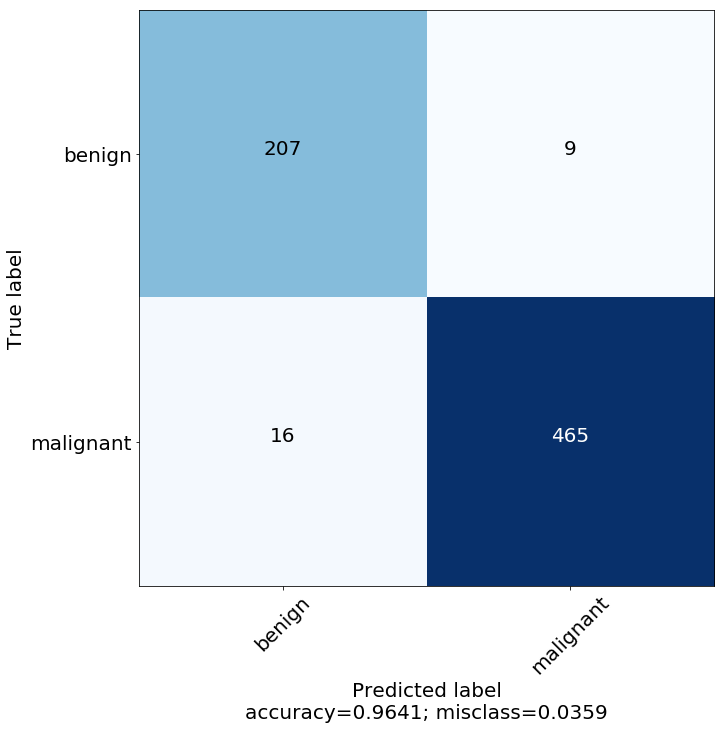

In [28]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

labels = []

label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

for k,v in indexlabel.items():
    labels.append(v)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.savefig('plots/3.InceptionV3-2-Private-DataSet-CM.png', bbox_inches='tight', dpi = 100) 


plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels, title=' ')

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred=predictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[207   9]
 [ 16 465]]
              precision    recall  f1-score   support

   malignant       0.93      0.96      0.94       216
      benign       0.98      0.97      0.97       481

   micro avg       0.96      0.96      0.96       697
   macro avg       0.95      0.96      0.96       697
weighted avg       0.96      0.96      0.96       697



In [30]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  92.82511210762333
Specificity :  98.10126582278481


In [31]:
print('roc_auc_score = ' + str(roc_auc_score(predictions, y_true)))

roc_auc_score = 0.9546318896520406


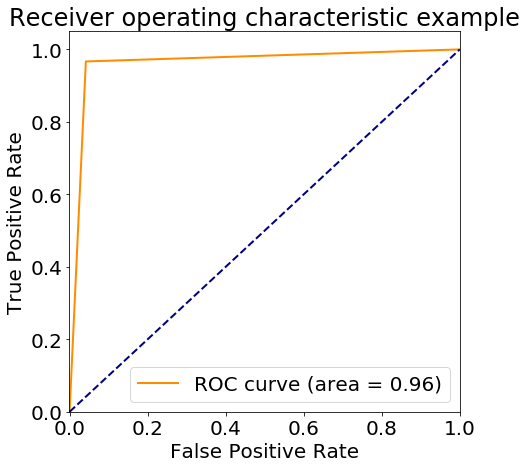

In [32]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [33]:
predict = model.predict_proba(test_data, batch_size=batch_size, verbose=1)

697/697 [==============================] - 0s 49us/step


In [34]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y = label_binarize(test_labels, classes=[0, 1])
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [35]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

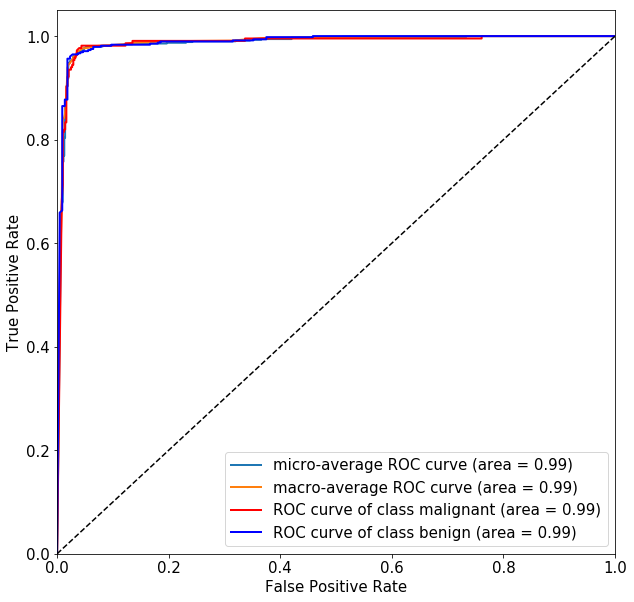

In [36]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from itertools import cycle
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
    

plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)
plot_name = 'no variation'
colors = cycle(['red','blue','green','yellow','orange', 'aqua', 'cornflowerblue'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classnames[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [37]:
tn, fp, fn, tp = cm.ravel()

In [38]:
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

Accuracy: 0.9641319942611191
Precision: 0.9810126582278481
Recall: 0.9667359667359667
tp: 465
fp: 9
tn: 207
fn: 16


In [39]:
print('F1 score:', f1_score(y_true, y_pred))

F1 score: 0.9738219895287958


In [40]:
recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

F1 score: 0.9738219895287958


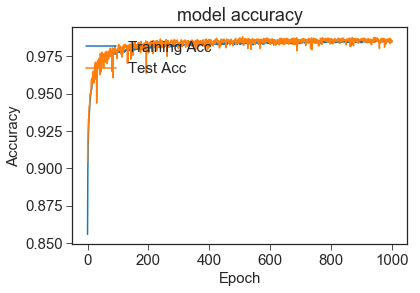

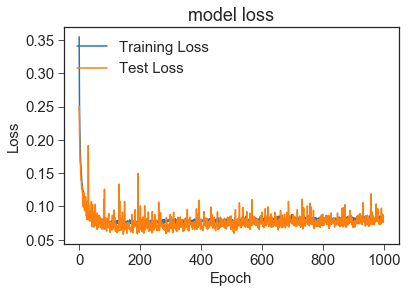

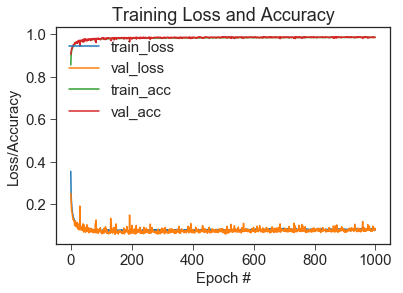

In [41]:
plt.style.use("seaborn-ticks")

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")